In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange


from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.simplefilter('ignore')

In [2]:
# Function to calculate metrics
def calculate_metrics(df, method, y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    df.loc[method] = [mae, mse, rmse]

In [3]:
# Function to calculate cross validation
def calculate_cross_validation_scores (df, model, method, X, y):
    my_cv = 10
    mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=my_cv).mean()
    mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=my_cv).mean()
    rmse = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=my_cv).mean()
    df.loc[method] = [mae, mse, rmse]

In [4]:

# Load the CSV file into a pandas dataframe
df = pd.read_csv("C:\\Users\\Acer\\CNC Machine.csv")
pd.set_option('display.max_columns', None)
df
#print(df.head())

,Untitled,Filename,start_time,end_time,edge,meterID,processing_time,average_power_consumption,number_of_missing_datapoints,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
0,0,2595627-1SP-Delfine.h,1649055030,1649055950,1237,2,920,2358.227174,0.0,13665960.0,5809,5,11,6,7943.871850,15.894075,43.432648,4.010019,397.763344,0.119715,3678.871193
1,1,2595627-2SP-Delfine.h,1649056780,1649057100,1237,2,320,2538.087500,0.0,13665960.0,462,4,13,7,7865.566916,11.488688,28.009050,4.208145,284.941176,0.056104,1829.434099
2,2,2584149-2SP-Delfine.h,1649237400,1649237800,1237,2,400,2618.128141,1.0,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
3,3,2584149-2SP-Delfine.h,1649243450,1649243800,1237,2,350,3386.402857,0.0,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
4,4,2584149-2SP-Delfine.h,1649243850,1649244200,1237,2,350,3306.637143,0.0,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,215,IC000141-2SP-Delfine.h,1657167310,1657167500,1237,2,190,2410.263158,0.0,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
216,216,IC000141-2SP-Delfine.h,1657167620,1657167800,1237,2,180,2666.305556,0.0,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
217,217,IC000141-2SP-Delfine.h,1657167950,1657168130,1237,2,180,2558.338889,0.0,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
218,218,IC000143-1SP-Delfine.h,1657168460,1657168850,1237,2,390,2684.589744,0.0,13665960.0,526,7,15,8,8016.445910,9.254704,19.909091,4.328063,229.905138,0.050791,1554.875394


In [5]:
#Dropping the columns as our group believes that they might not have signifcant relevant
dataset = df.drop(['Untitled','Filename','start_time', 'end_time','edge','meterID','number_of_missing_datapoints'],axis=1)

# Checking descriptives without 'Model'
dataset.describe(include='all')


,processing_time,average_power_consumption,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
count,220.000000,220.000000,2.200000e+02,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1022.886364,2835.372458,8.069418e+06,6895.327273,5.763636,48.781818,24.890909,7266.174121,11.980351,24.331000,3.957454,250.885067,0.090757,2286.169645
std,1457.893633,720.797069,6.621539e+06,9597.106987,4.731952,72.534971,36.267486,2189.851476,4.103559,11.825378,0.990693,106.988638,0.056323,1100.339999
min,100.000000,1552.895455,2.492280e+04,86.000000,1.000000,3.000000,2.000000,1992.065474,3.643155,5.289720,2.000000,40.000000,0.021064,128.391909
25%,292.500000,2181.747535,8.751360e+04,313.000000,2.000000,7.000000,4.000000,6651.293788,9.133333,12.719512,4.016703,166.427711,0.058525,1308.767723
50%,480.000000,2865.267542,1.366596e+07,968.500000,4.000000,21.000000,11.000000,7779.717345,12.126168,24.225867,4.062263,260.666667,0.081556,2285.863574
75%,912.500000,3451.490151,1.366596e+07,13447.000000,6.250000,63.000000,32.000000,8008.453531,15.506092,35.790476,4.462287,346.413408,0.100010,3115.166406
max,6920.000000,4355.949333,1.366596e+07,44441.000000,18.000000,263.000000,132.000000,11075.766550,19.136999,43.432648,5.646341,397.763344,0.470000,4428.093546


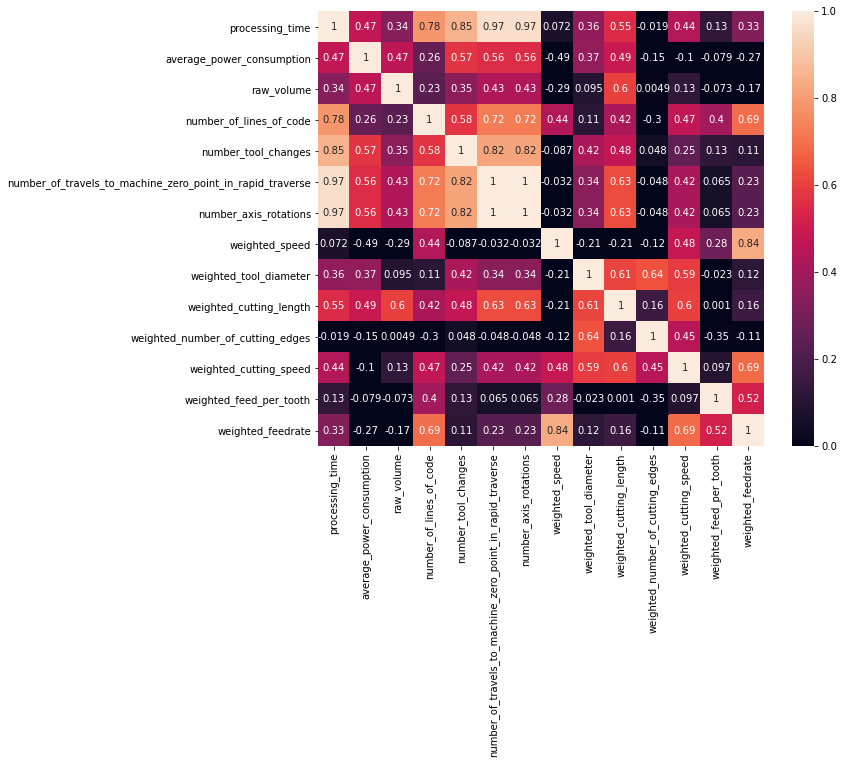

In [6]:
import seaborn as sns

# Calculate correlations
correlations = dataset.corr()

# Create a larger figure
plt.figure(figsize=(10, 8))  # Adjust the size as per your preference

# Plot the heatmap with fixed values from 0 to 1
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=True, vmin=0, vmax=1)

# Display the plot
plt.show()


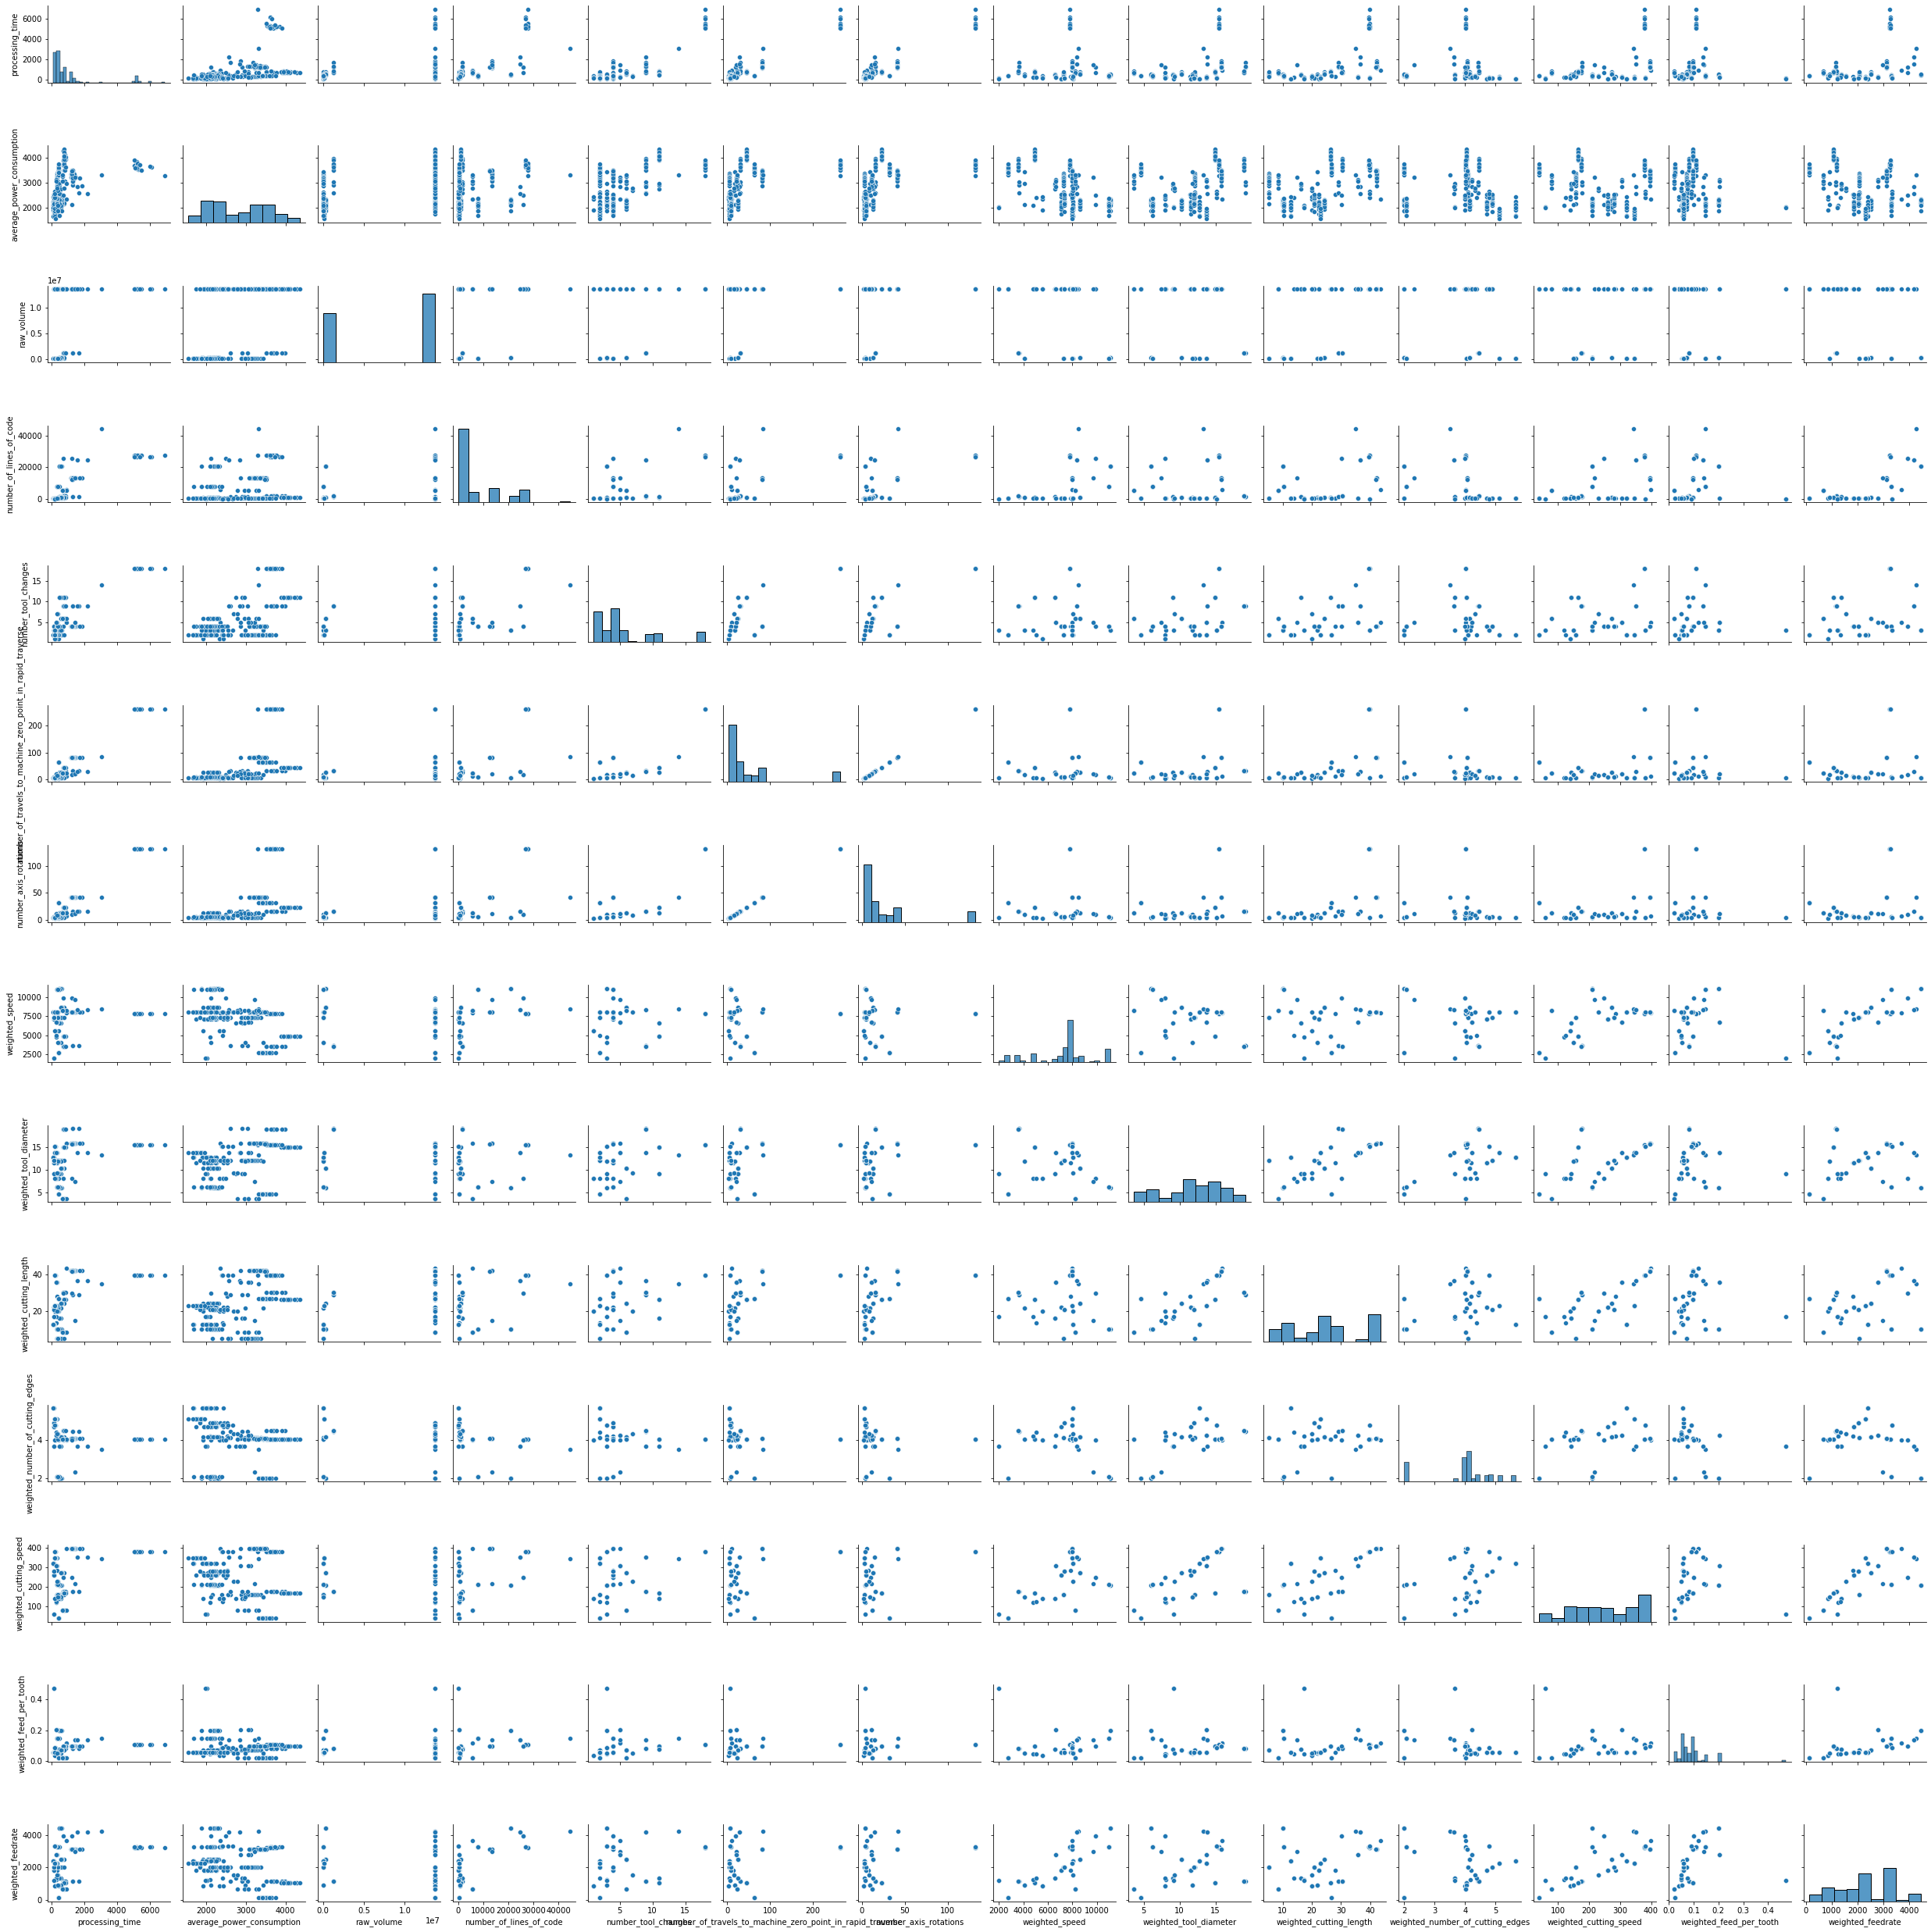

In [7]:
sns.pairplot(dataset)

In [8]:
# Get X (independent variables) and y (dependent variable)
y_label = 'processing_time'
X = dataset.loc[:, dataset.columns != y_label]
display(pd.DataFrame(X))
y = dataset.loc[:, y_label]
display(pd.DataFrame(y))

,average_power_consumption,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
0,2358.227174,13665960.0,5809,5,11,6,7943.871850,15.894075,43.432648,4.010019,397.763344,0.119715,3678.871193
1,2538.087500,13665960.0,462,4,13,7,7865.566916,11.488688,28.009050,4.208145,284.941176,0.056104,1829.434099
2,2618.128141,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
3,3386.402857,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
4,3306.637143,42000.0,234,2,5,3,7269.291649,12.126168,5.289720,4.107477,158.415888,0.072637,2042.870383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,2410.263158,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
216,2666.305556,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
217,2558.338889,13665960.0,150,3,7,4,8000.392518,15.138462,39.707692,4.784615,380.461538,0.089231,3310.606457
218,2684.589744,13665960.0,526,7,15,8,8016.445910,9.254704,19.909091,4.328063,229.905138,0.050791,1554.875394


,processing_time
0,920
1,320
2,400
3,350
4,350
...,...
215,190
216,180
217,180
218,390


In [9]:
my_test_size = 0.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, random_state=42)
X_train.describe()

,average_power_consumption,raw_volume,number_of_lines_of_code,number_tool_changes,number_of_travels_to_machine_zero_point_in_rapid_traverse,number_axis_rotations,weighted_speed,weighted_tool_diameter,weighted_cutting_length,weighted_number_of_cutting_edges,weighted_cutting_speed,weighted_feed_per_tooth,weighted_feedrate
count,176.000000,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,2833.408091,8.040613e+06,6307.829545,5.801136,47.375000,24.187500,7176.127820,12.226170,24.450262,4.057171,253.005783,0.087655,2246.980408
std,728.950113,6.628658e+06,9273.040608,4.761776,72.554817,36.277408,2093.497889,3.936794,11.485945,0.954996,104.495442,0.050386,1064.156108
min,1552.895455,2.492280e+04,86.000000,1.000000,3.000000,2.000000,1992.065474,3.643155,5.289720,2.000000,40.000000,0.021064,128.391909
25%,2188.103299,8.751360e+04,313.000000,2.000000,7.000000,4.000000,6564.360381,10.295220,13.608449,4.029052,166.427711,0.058523,1228.905491
50%,2793.377796,1.366596e+07,850.000000,4.000000,21.000000,11.000000,7779.717345,12.707317,24.225867,4.062263,260.666667,0.075496,2285.863574
75%,3451.490151,1.366596e+07,13348.000000,9.000000,45.000000,23.000000,8008.453531,15.503060,31.681196,4.699454,346.413408,0.097018,3115.166406
max,4355.949333,1.366596e+07,27591.000000,18.000000,263.000000,132.000000,11075.766550,19.136999,43.432648,5.646341,397.763344,0.470000,4428.093546


In [10]:
# create error dataframe
error_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'], index = ['Decision Tree Regression', 'Random Forest Regression','Support Vector Regression','XGBoost','Neural Network'])
display(error_df)


,MAE,MSE,RMSE
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


In [11]:
# create cross valudation dataframe
cv_df = pd.DataFrame(columns = ['MAE', 'MSE', 'RMSE'], index = ['Decision Tree Regression', 'Random Forest Regression','Support Vector Regression','XGBoost','Neural Network'])
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,NaN,NaN,NaN
Random Forest Regression,NaN,NaN,NaN
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


In [16]:

from sklearn.preprocessing import MinMaxScaler


# Select the columns to be scaled
columns_to_scale = ['processing_time', 'number_of_lines_of_code', 'weighted_speed', 'number_of_missing_datapoints',
                    'raw_volume', 'number_tool_changes', 'number_axis_rotations', 'weighted_tool_diameter',
                    'weighted_cutting_length', 'weighted_number_of_cutting_edges', 'weighted_cutting_speed',
                    'weighted_feed_per_tooth', 'weighted_feedrate','average_power_consumption' ]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns using the scaler object
dataset[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the first 10 rows of the transformed dataframe
print(dataset.head(10))


   processing_time  average_power_consumption  raw_volume  \
0         0.120235                   0.287305    1.000000   
1         0.032258                   0.351471    1.000000   
2         0.043988                   0.380026    0.001252   
3         0.036657                   0.654111    0.001252   
4         0.036657                   0.625654    0.001252   
5         0.032258                   0.486917    0.001252   
6         0.043988                   0.477791    0.001252   
7         0.064516                   0.355709    0.001252   
8         0.032258                   0.612294    0.001252   
9         0.035191                   0.594084    0.001252   

   number_of_lines_of_code  number_tool_changes  \
0                 0.129027             0.235294   
1                 0.008477             0.176471   
2                 0.003337             0.058824   
3                 0.003337             0.058824   
4                 0.003337             0.058824   
5                 0.00

# DECISION TREE

In [17]:
#Fitting decision tree regression to dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42, min_samples_split=2, max_depth=5)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,552.352941
1,111.818182
2,1362.222222
3,208.333333
4,401.071429
5,401.071429
6,155.000000
7,743.750000
8,5275.000000
9,552.352941


In [18]:

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the DataFrame
print(results_df.head(100))


     Actual    Predicted
132     480   552.352941
148     120   111.818182
93     1300  1362.222222
180     210   208.333333
15      370   401.071429
115     420   401.071429
172     150   155.000000
209     670   743.750000
75     5100  5275.000000
142     560   552.352941
100    1300  1362.222222
30      750   743.750000
190     370   348.571429
9       340   401.071429
67     5300  5500.000000
218     390   300.000000
175     160   155.000000
18      770   401.071429
197     380   348.571429
66     5200  5275.000000
189     500   348.571429
96     1300  1362.222222
210     690   743.750000
25      730   743.750000
127     590   552.352941
201    3050  1560.000000
97     1250  1362.222222
16      380   401.071429
45      780   743.750000
154     120   111.818182
111     420   401.071429
55      140   150.000000
108     420   401.071429
196     340   348.571429
73     5200  5275.000000
109     410   401.071429
82     1300  1362.222222
138     490   552.352941
141     470   552.352941


In [19]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))


     Actual    Predicted  Index
132     480   552.352941      1
148     120   111.818182      2
93     1300  1362.222222      3
180     210   208.333333      4
15      370   401.071429      5
115     420   401.071429      6
172     150   155.000000      7
209     670   743.750000      8
75     5100  5275.000000      9
142     560   552.352941     10
100    1300  1362.222222     11
30      750   743.750000     12
190     370   348.571429     13
9       340   401.071429     14
67     5300  5500.000000     15
218     390   300.000000     16
175     160   155.000000     17
18      770   401.071429     18
197     380   348.571429     19
66     5200  5275.000000     20
189     500   348.571429     21
96     1300  1362.222222     22
210     690   743.750000     23
25      730   743.750000     24
127     590   552.352941     25
201    3050  1560.000000     26
97     1250  1362.222222     27
16      380   401.071429     28
45      780   743.750000     29
154     120   111.818182     30
111     

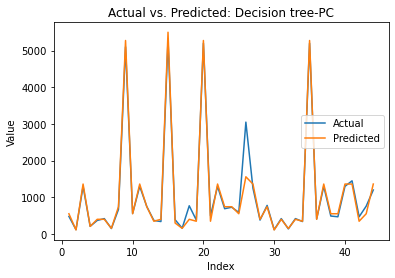

In [20]:
import matplotlib.pyplot as plt

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: Decision tree-PC')
plt.legend()

#Show plot
plt.show()

In [21]:
method = 'Decision Tree Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor,method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,98.91492,59734.106753,244.405619
Random Forest Regression,NaN,NaN,NaN
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


,MAE,MSE,RMSE
Decision Tree Regression,-217.04953,-167643.35476,-312.224939
Random Forest Regression,NaN,NaN,NaN
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


Intercept 1122.2784263009776
Prediction_local [960.09029874]
Right: 552.3529411764706


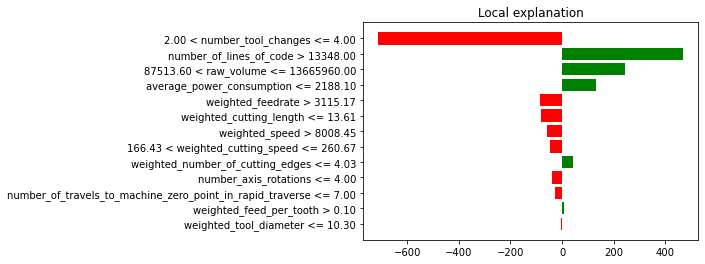

In [23]:
import lime
import lime.lime_tabular
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt

# Define the predict function for Lime
#predict_fn_tree = lambda x: regressor.predict(x).reshape(-1, 1)

# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['processing_time'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
heading_name = "My Lime Explanation"
doc.add_heading(heading_name, level=3)

# Update the heading text
for paragraph in doc.paragraphs:
    if paragraph.style.name == "Heading 3":
        paragraph.text = heading_name


# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


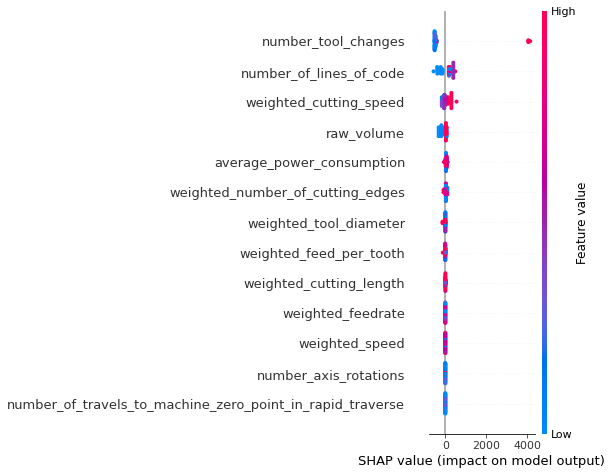

In [24]:
import shap

# Initialize the TreeExplainer
explainer = shap.TreeExplainer(regressor)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Disable the additivity check
#shap_values.additivity_check = False

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

# random forest




In [25]:
#Fitting random forest regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 60, random_state = 42)
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,491.000000
1,121.833333
2,1353.333333
3,248.666667
4,357.666667
5,422.333333
6,153.166667
7,811.583333
8,5347.833333
9,491.333333


     Actual    Predicted  Index
132     480   491.000000      1
148     120   121.833333      2
93     1300  1353.333333      3
180     210   248.666667      4
15      370   357.666667      5
115     420   422.333333      6
172     150   153.166667      7
209     670   811.583333      8
75     5100  5347.833333      9
142     560   491.333333     10
100    1300  1605.833333     11
30      750   737.500000     12
190     370   358.166667     13
9       340   331.833333     14
67     5300  5463.666667     15
218     390   336.500000     16
175     160   171.166667     17
18      770   476.166667     18
197     380   358.166667     19
66     5200  5334.500000     20
189     500   358.166667     21
96     1300  1458.333333     22
210     690   761.250000     23
25      730   758.833333     24
127     590   605.166667     25
201    3050  2536.833333     26
97     1250  1434.166667     27
16      380   341.833333     28
45      780   773.333333     29
154     120   121.166667     30
111     

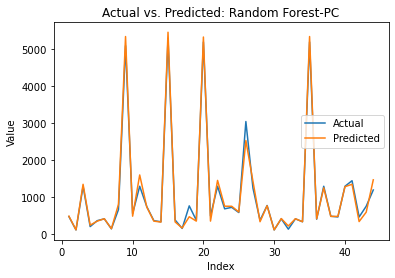

In [26]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: Random Forest-PC')
plt.legend()

#Show plot
plt.show()

In [27]:
method = 'Random Forest Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,98.91492,59734.106753,244.405619
Random Forest Regression,85.060606,18789.422664,137.074515
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


,MAE,MSE,RMSE
Decision Tree Regression,-217.04953,-167643.35476,-312.224939
Random Forest Regression,-219.743182,-116271.465025,-303.144064
Support Vector Regression,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


Intercept 1139.020464483665
Prediction_local [936.25985353]
Right: 491.0


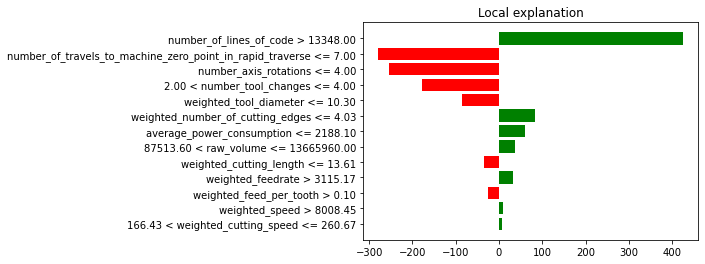

In [29]:
# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['processing_time'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


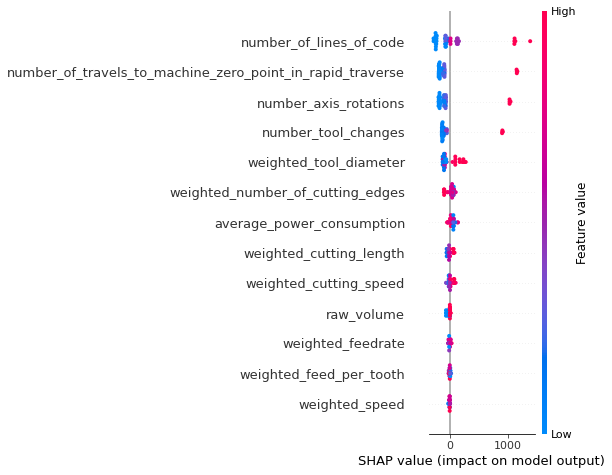

In [30]:
# Initialize the TreeExplainer
explainer = shap.TreeExplainer(regressor)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Disable the additivity check
#shap_values.additivity_check = False

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

# SVR

In [31]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='poly', degree=13)
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))

,0
0,379.899999
1,749.845400
2,751.379489
3,379.899999
4,379.899999
5,749.812777
6,749.863741
7,750.459236
8,752.987257
9,379.899999


     Actual   Predicted  Index
132     480  379.899999      1
148     120  749.845400      2
93     1300  751.379489      3
180     210  379.899999      4
15      370  379.899999      5
115     420  749.812777      6
172     150  749.863741      7
209     670  750.459236      8
75     5100  752.987257      9
142     560  379.899999     10
100    1300  751.379120     11
30      750  379.899999     12
190     370  379.899999     13
9       340  379.899999     14
67     5300  752.986776     15
218     390  749.894270     16
175     160  749.865615     17
18      770  379.899999     18
197     380  379.899999     19
66     5200  752.986918     20
189     500  379.899999     21
96     1300  751.378466     22
210     690  750.460732     23
25      730  379.899999     24
127     590  379.899999     25
201    3050  754.916804     26
97     1250  751.379221     27
16      380  379.899999     28
45      780  749.899365     29
154     120  749.844166     30
111     420  749.813041     31
55      

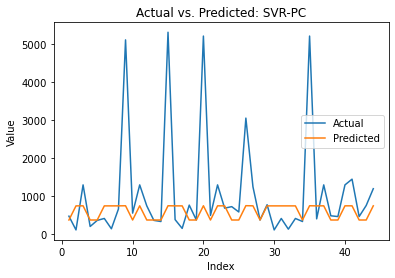

In [32]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: SVR-PC')
plt.legend()

#Show plot
plt.show()

In [33]:
method = 'Support Vector Regression'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,98.91492,59734.106753,244.405619
Random Forest Regression,85.060606,18789.422664,137.074515
Support Vector Regression,728.460276,2045617.502456,1430.250853
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


,MAE,MSE,RMSE
Decision Tree Regression,-217.04953,-167643.35476,-312.224939
Random Forest Regression,-219.743182,-116271.465025,-303.144064
Support Vector Regression,-782.343885,-2337837.139139,-997.815127
XGBoost,NaN,NaN,NaN
Neural Network,NaN,NaN,NaN


Intercept 380.9796143197445
Prediction_local [416.56275448]
Right: 379.8999989368518


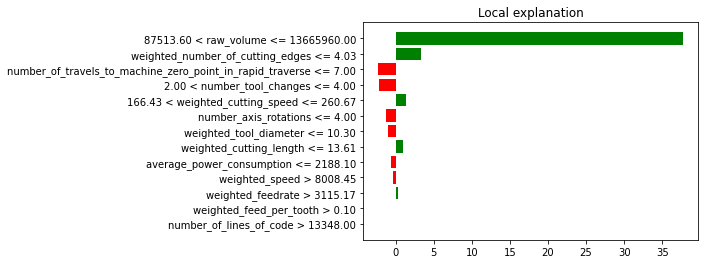

In [35]:
# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['processing_time'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


  0%|          | 0/44 [00:00<?, ?it/s]

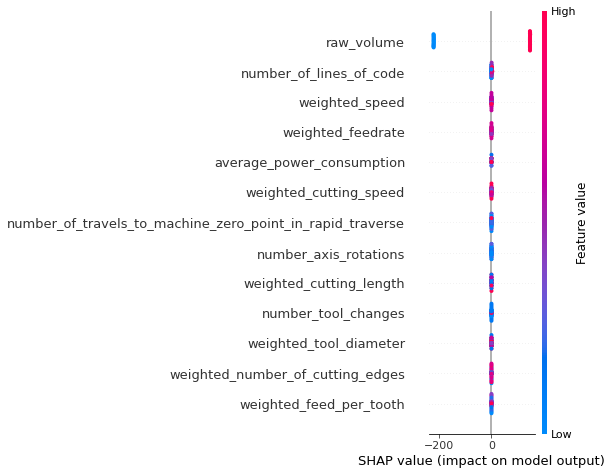

In [36]:
# Summarize the background data using shap.sample or shap.kmeans
background_summary = shap.sample(X_train, 20)  
# Initialize the explainer object with the summarized background
explainer = shap.KernelExplainer(regressor.predict, background_summary)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first feature
shap.summary_plot(shap_values, X_test)


# XGBoost

In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lime
import lime.lime_tabular
import shap


In [38]:
# Train the XGBoost model
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

#prediction of test dataset
y_pred = regressor.predict(X_test)
display(pd.DataFrame(y_pred))


,0
0,524.464355
1,120.943123
2,1298.889404
3,211.433792
4,359.489319
5,452.778046
6,150.182800
7,800.683289
8,5300.253418
9,557.707031


     Actual    Predicted  Index
132     480   524.464355      1
148     120   120.943123      2
93     1300  1298.889404      3
180     210   211.433792      4
15      370   359.489319      5
115     420   452.778046      6
172     150   150.182800      7
209     670   800.683289      8
75     5100  5300.253418      9
142     560   557.707031     10
100    1300  1697.658081     11
30      750   721.381775     12
190     370   361.195770     13
9       340   318.802765     14
67     5300  5497.254395     15
218     390   340.155090     16
175     160   151.009003     17
18      770   581.020264     18
197     380   360.930267     19
66     5200  5250.682617     20
189     500   368.316437     21
96     1300  1452.075195     22
210     690   699.254211     23
25      730   750.319458     24
127     590   605.944275     25
201    3050  6902.730469     26
97     1250  1402.382080     27
16      380   330.688232     28
45      780   750.201721     29
154     120   124.530663     30
111     

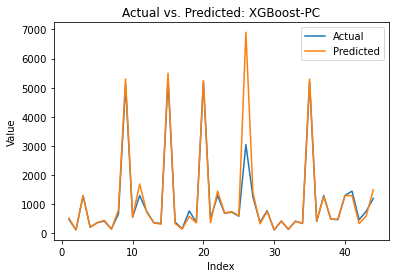

In [39]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: XGBoost-PC')
plt.legend()

#Show plot
plt.show()

In [40]:
method = 'XGBoost'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, regressor,method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,98.91492,59734.106753,244.405619
Random Forest Regression,85.060606,18789.422664,137.074515
Support Vector Regression,728.460276,2045617.502456,1430.250853
XGBoost,153.527129,349461.823155,591.152961
Neural Network,NaN,NaN,NaN


,MAE,MSE,RMSE
Decision Tree Regression,-217.04953,-167643.35476,-312.224939
Random Forest Regression,-219.743182,-116271.465025,-303.144064
Support Vector Regression,-782.343885,-2337837.139139,-997.815127
XGBoost,-238.702044,-208629.192694,-374.04949
Neural Network,NaN,NaN,NaN


Intercept 470.327477781493
Prediction_local [1310.87974829]
Right: 524.46436


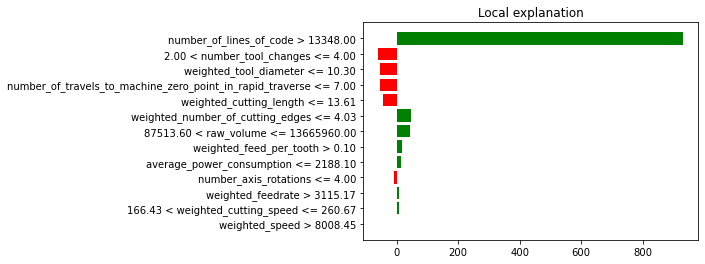

In [42]:
# Define the explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns,
                    class_names=['processing_time'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test.iloc[0]

# Generate the explanation for the instance using LIME
exp = explainer.explain_instance(instance.values,regressor.predict, num_features=len(X_train.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


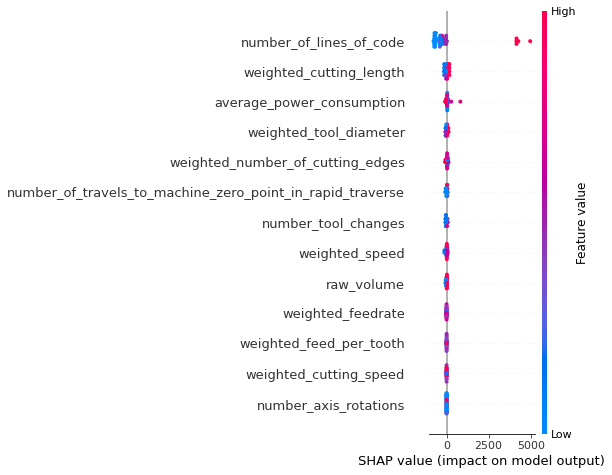

In [43]:
# Initialize the TreeExplainer
explainer = shap.Explainer(regressor)

# Explain the model predictions on the test set
shap_values = explainer.shap_values(X_test)

# Disable the additivity check
#shap_values.additivity_check = False

# Plot the SHAP values
shap.summary_plot(shap_values, X_test)

# Neural Network

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


# Feature scaling - Standardize the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Define the model building function
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(16, input_dim=13, activation='relu'))
    model.add(keras.layers.Dense(8, activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create the KerasRegressor wrapper
regressor = KerasRegressor(build_fn=build_model, verbose=0)

# Use GridSearchCV to tune hyperparameters
param_grid = {
    'batch_size': [10, 20],
    'epochs': [50, 100]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best model from the grid search
best_regressor = grid_search.best_estimator_

y_pred = best_regressor.predict(X_test_scaled)
display(pd.DataFrame(y_pred))

Best Hyperparameters:  {'batch_size': 10, 'epochs': 100}
Best Score:  -299390.146875


,0
0,624.096619
1,201.189209
2,2161.696289
3,224.559814
4,424.032501
5,463.859528
6,155.348129
7,510.287079
8,4788.670898
9,612.714783


     Actual    Predicted  Index
132     480   624.096619      1
148     120   201.189209      2
93     1300  2161.696289      3
180     210   224.559814      4
15      370   424.032501      5
115     420   463.859528      6
172     150   155.348129      7
209     670   510.287079      8
75     5100  4788.670898      9
142     560   612.714783     10
100    1300  2139.626709     11
30      750   782.410339     12
190     370   318.492188     13
9       340   422.349243     14
67     5300  4759.907715     15
218     390   327.845306     16
175     160   150.292084     17
18      770   442.102509     18
197     380   318.593689     19
66     5200  4768.447266     20
189     500   320.649597     21
96     1300  2100.516602     22
210     690   505.107391     23
25      730   775.248901     24
127     590   330.057587     25
201    3050  3814.572266     26
97     1250  2145.671387     27
16      380   425.818848     28
45      780   954.675232     29
154     120   204.517654     30
111     

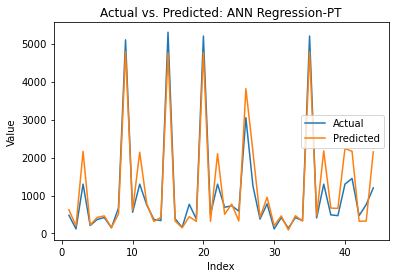

In [45]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add a new column with increasing natural numbers
results_df['Index'] = range(1, len(results_df) + 1)

# Print the DataFrame
print(results_df.head(100))

#Create a figure and axis object
fig, ax = plt.subplots()

#Plot actual data
ax.plot(results_df['Index'], results_df['Actual'], label='Actual')

#Plot predicted data
ax.plot(results_df['Index'], results_df['Predicted'], label='Predicted')

#Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted: ANN Regression-PT')
plt.legend()

#Show plot
plt.show()

In [46]:
method = 'Neural Network'
calculate_metrics(error_df, method, y_test, y_pred)
display(error_df)
calculate_cross_validation_scores (cv_df, best_regressor, method, X, y)
display(cv_df)

,MAE,MSE,RMSE
Decision Tree Regression,98.91492,59734.106753,244.405619
Random Forest Regression,85.060606,18789.422664,137.074515
Support Vector Regression,728.460276,2045617.502456,1430.250853
XGBoost,153.527129,349461.823155,591.152961
Neural Network,287.50444,180178.470919,424.474347


,MAE,MSE,RMSE
Decision Tree Regression,-217.04953,-167643.35476,-312.224939
Random Forest Regression,-219.743182,-116271.465025,-303.144064
Support Vector Regression,-782.343885,-2337837.139139,-997.815127
XGBoost,-238.702044,-208629.192694,-374.04949
Neural Network,-1424.567829,-2105147.131478,-1160.166132


Intercept 670.6070670396614
Prediction_local [497.15894919]
Right: 624.0966


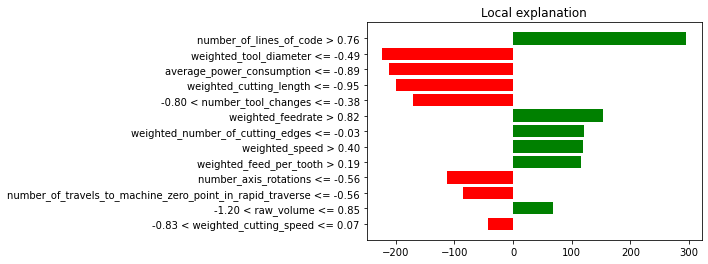

In [48]:
# Define the predict function for Lime
def predict_fn(x):
    return best_regressor.predict(x)

# Define the explainer object for Lime
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_scaled, feature_names=X.columns.values,
                                                   class_names=['processing_time'], verbose=True, mode='regression')

# Choose an instance to explain
instance = X_test_scaled[0]

# Generate the explanation for the instance using Lime
exp = explainer.explain_instance(instance, predict_fn, num_features=len(X.columns))

# Get the explanation figure as a pyplot figure
fig = exp.as_pyplot_figure()

# Save the Lime figure to a temporary file
temp_file = "lime_figure.png"
fig.savefig(temp_file, bbox_inches='tight', dpi=300)

# Create a Word document
doc = Document()

# Add a heading
doc.add_heading('Lime Explanation', level=1)

# Add the Lime figure to the Word document
doc.add_picture(temp_file, width=Inches(6))  # Adjust the width as needed

# Save the Word document
doc.save('suman.docx')


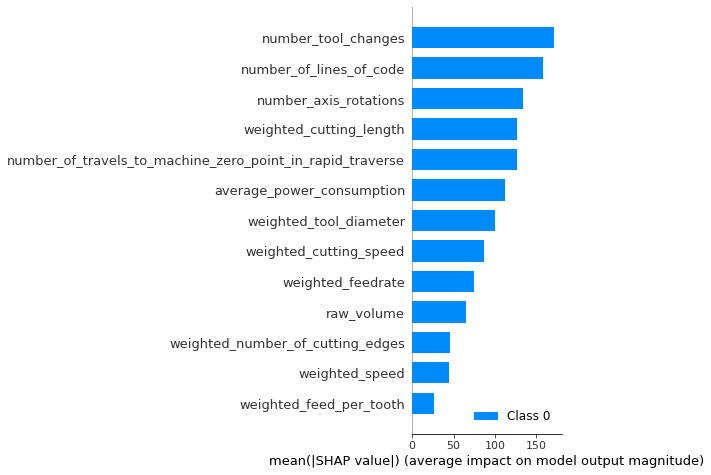

In [49]:
import shap
import numpy as np

# Convert KerasRegressor to Keras Sequential model
model = grid_search.best_estimator_.model

# Create an explainer object
explainer = shap.DeepExplainer(model, X_train_scaled)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train_scaled)

# Plot the SHAP values
shap.summary_plot(shap_values, X_train_scaled, feature_names=X_train.columns)
